# **Project Name**    - Tata Steel machine performance analysis



 **Project Type**    - EDA
 **Contribution**    - Individual

# **Project Summary -**
This project aims to analyze and optimize the machine performance at Tata Steel using data analytics techniques. The goal is to enhance operational efficiency, reduce downtime, and predict equipment failures before they occur, enabling a shift towards predictive maintenance.

The primary focus of the project is on examining the performance of various machines within Tata Steel’s production line by leveraging historical machine data. Key factors like air temperature, process temperature, rotational speed, torque, tool wear, and machine failures are considered to gain insights into machine health and performance. 

Key Objectives:

* Predictive Maintenance: Using machine learning models to predict potential machine failures based on historical data, reducing unplanned downtime.
* Data-Driven Insights: Visualizing and analyzing machine data to identify patterns and correlations between operational variables and machine failure.
* Optimization of Performance: Utilizing data analytics to fine-tune machine settings for improved performance and energy efficiency.
* Improvement in Operational Efficiency: By identifying potential weak points in the system, ensuring that the machines operate at peak performance, thus improving overall productivity.

Approach:

* Data Collection and Preprocessing: Collect data from machines (including temperature, speed, torque, and wear) and preprocess it by handling missing values, encoding categorical variables, and normalizing features.

* Exploratory Data Analysis (EDA): Visualizing the distribution of features and relationships between variables using statistical graphs such as histograms, box plots, scatter plots, and correlation matrices.

Expected Outcomes: 

* A predictive model that can identify machines likely to fail, allowing for proactive maintenance.
* Insights into the relationships between operational conditions (like temperature and speed) and machine performance.
* A visualization dashboard to track real-time performance and failure predictions.


This project will empower Tata Steel with data-driven decisions for improving machine reliability, reducing maintenance costs, and increasing the overall efficiency of the production line.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Dataset Loading

In [130]:
data = pd.read_csv(r"c:\Users\tanve\Desktop\dataset\project_1\train (2).csv")

### Dataset First View

In [131]:
data.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### Dataset Rows & Columns count

In [132]:
# Dataset Rows & Columns count
count = data.shape
count


(136429, 14)

### Dataset Information

In [133]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

#### Duplicate Values

In [134]:
# Dataset Duplicate Value Count
duplicate_count = data[data.duplicated()].sum()
duplicate_count

id                           0
Product ID                   0
Type                         0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]       0
Torque [Nm]                0.0
Tool wear [min]              0
Machine failure              0
TWF                          0
HDF                          0
PWF                          0
OSF                          0
RNF                          0
dtype: object

#### Missing Values/Null Values

In [135]:
# Missing Values/Null Values Count
missing_values = data.isnull().sum()
missing_values

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [136]:
total_missing = data.isnull().sum()
total_missing

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

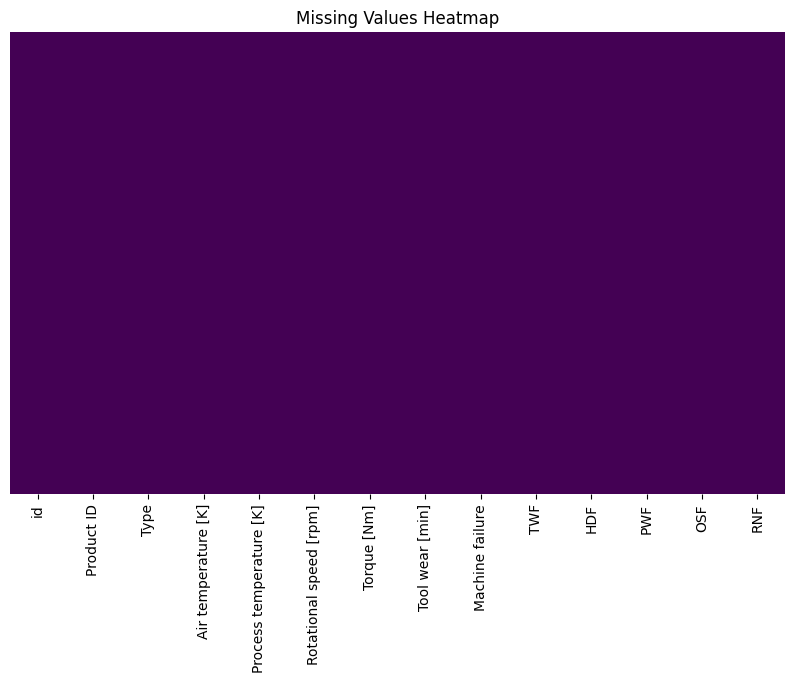

In [137]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [138]:
# Dataset Columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [139]:
# Dataset Describe
data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [140]:
# Check Unique Values for each variable.
data.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [141]:
# Write your code to make your dataset analysis ready.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
# Drop rows with missing values (or columns if too many missing)
df = data.dropna()
  
# Normalize or Standardize Numerical Variables
# Standardization (Mean = 0, Std = 1) for numeric columns
scaler = StandardScaler()
df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Save the cleaned and prepared dataset
df.to_csv("analysis_ready_data.csv", index=False)
analysis_data = pd.read_csv(r"analysis_ready_data.csv")
# Display basic information about the cleaned dataset
analysis_data.info()  # Data types and shape after wrangling
analysis_data.head()  # Preview the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  float64
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  float64
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  float64
 8   Machine failure          136429 non-null  float64
 9   TWF                      136429 non-null  float64
 10  HDF                      136429 non-null  float64
 11  PWF                      136429 non-null  float64
 12  OSF                      136429 non-null  float64
 13  RNF                      136429 non-null  float64
dtypes: f

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,-1.732038,L50096,L,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.126477,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
1,-1.732013,M20343,M,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.126477,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
2,-1.731987,L49454,L,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.126477,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
3,-1.731962,L53355,L,0.610675,0.692284,0.026445,0.464745,1.447532,-0.126477,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
4,-1.731937,M24050,M,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.126477,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Figure size 1000x600 with 0 Axes>

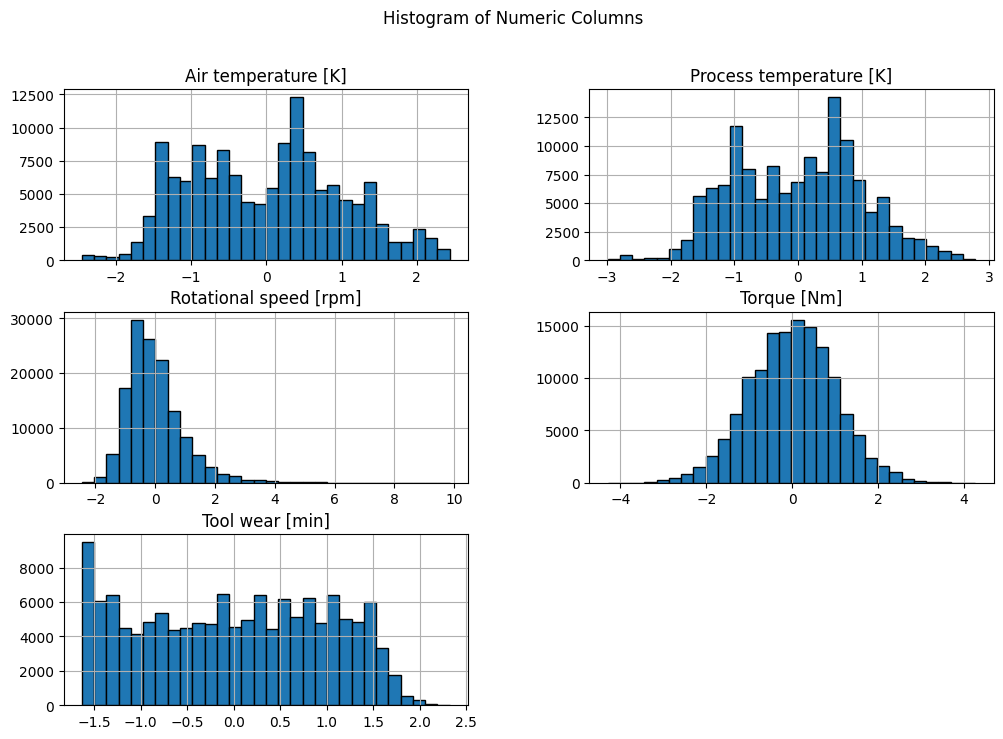

In [142]:
# Chart - 1 visualization code
# 1. Histogram of numeric columns
plt.figure(figsize=(10, 6))
analysis_data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histogram of Numeric Columns')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

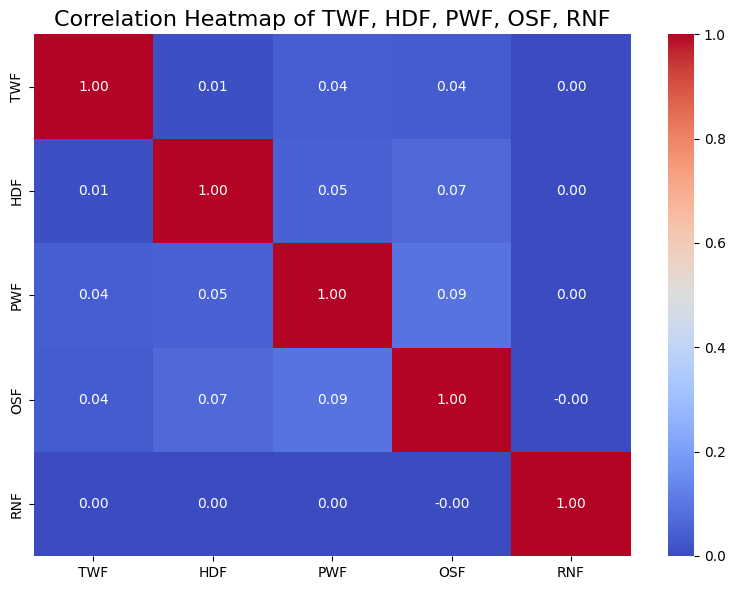

In [163]:
import seaborn as sns

# Calculate correlation matrix for TWF, HDF, PWF, OSF, RNF
correlation_matrix = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of TWF, HDF, PWF, OSF, RNF', fontsize=16)
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

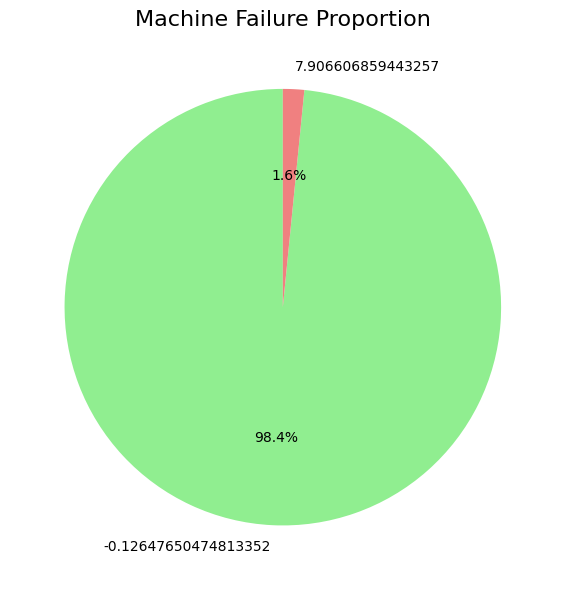

In [144]:
# Ensure the 'Machine failure' column is present in the DataFrame
failure_counts = df['Machine failure'].value_counts()

# Pie chart for Machine failure proportion
plt.figure(figsize=(8, 6))
failure_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90, legend=False)
plt.title('Machine Failure Proportion', fontsize=16)
plt.ylabel('')  # Remove the default ylabel
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Figure size 800x600 with 0 Axes>

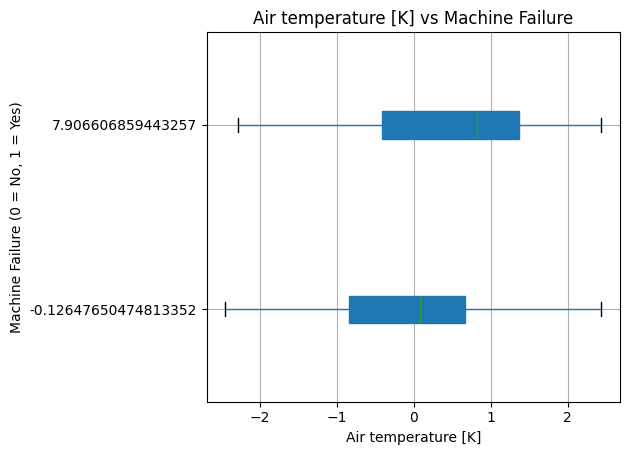

<Figure size 800x600 with 0 Axes>

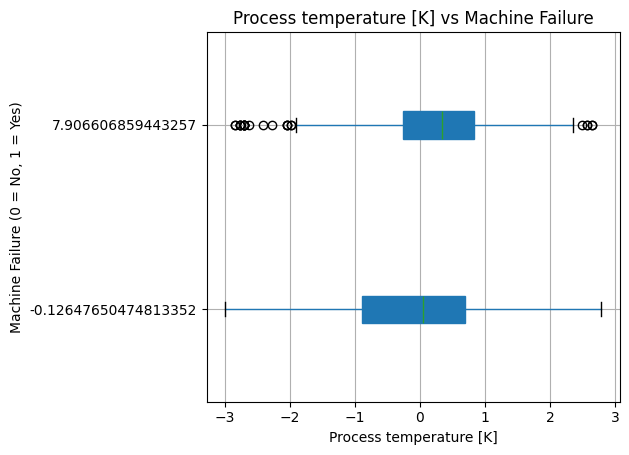

<Figure size 800x600 with 0 Axes>

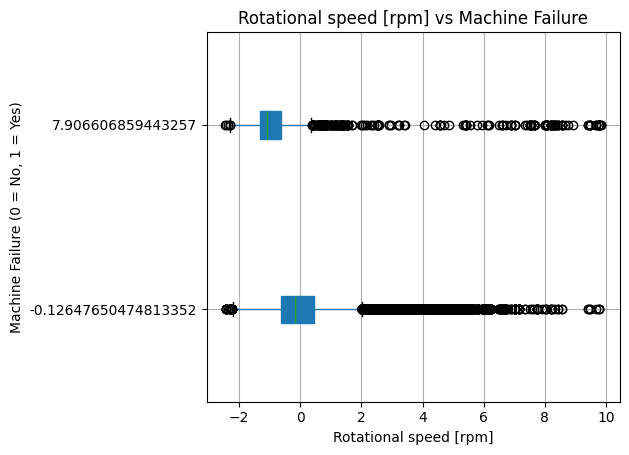

<Figure size 800x600 with 0 Axes>

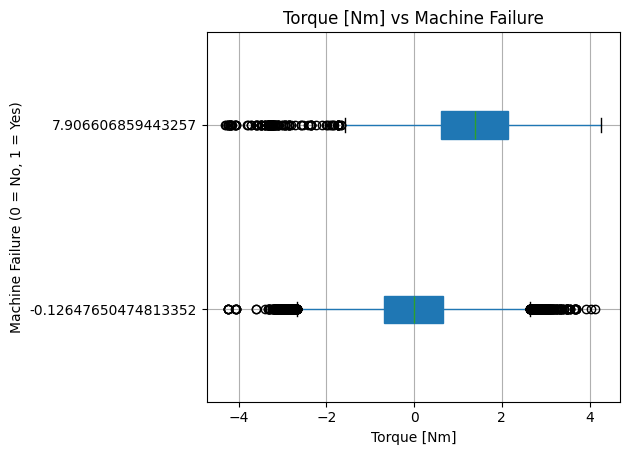

<Figure size 800x600 with 0 Axes>

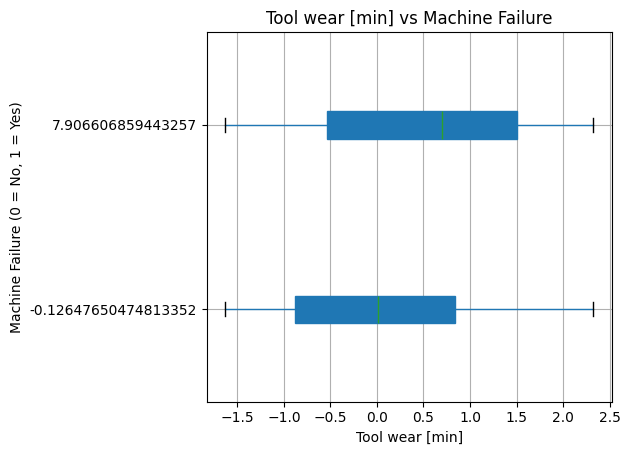

In [164]:
# Box plot for continuous variables vs Machine failure
continuous_vars = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=var, by='Machine failure', vert=False, patch_artist=True)
    plt.title(f'{var} vs Machine Failure')
    plt.suptitle("")  # Remove the default title generated by boxplot
    plt.xlabel(var)
    plt.ylabel('Machine Failure (0 = No, 1 = Yes)')
    plt.tight_layout()
    plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

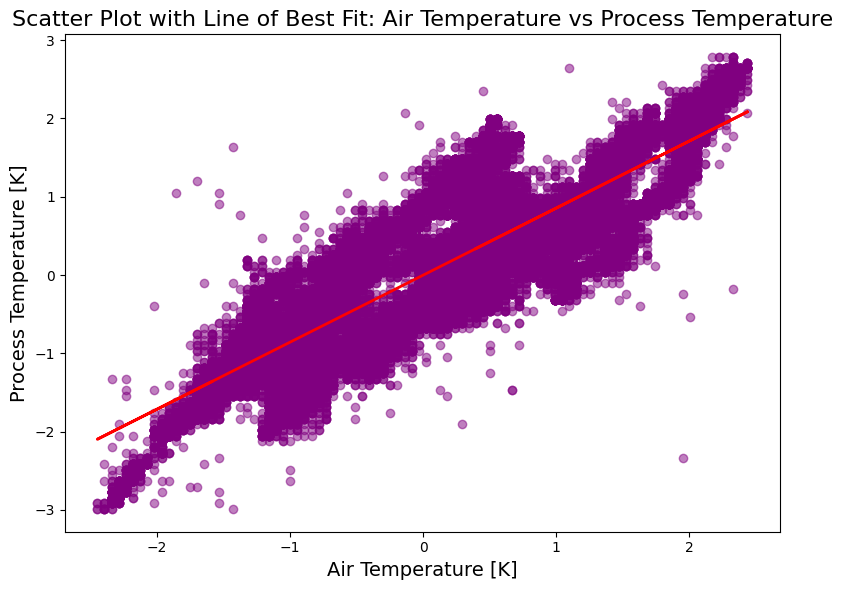

In [146]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Reshape data for linear regression
X = df['Air temperature [K]'].values.reshape(-1, 1)
y = df['Process temperature [K]'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Scatter plot with line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(df['Air temperature [K]'], df['Process temperature [K]'], alpha=0.5, color='purple')
plt.plot(df['Air temperature [K]'], y_pred, color='red', linewidth=2)
plt.title('Scatter Plot with Line of Best Fit: Air Temperature vs Process Temperature', fontsize=16)
plt.xlabel('Air Temperature [K]', fontsize=14)
plt.ylabel('Process Temperature [K]', fontsize=14)
plt.tight_layout()
plt.show()






##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

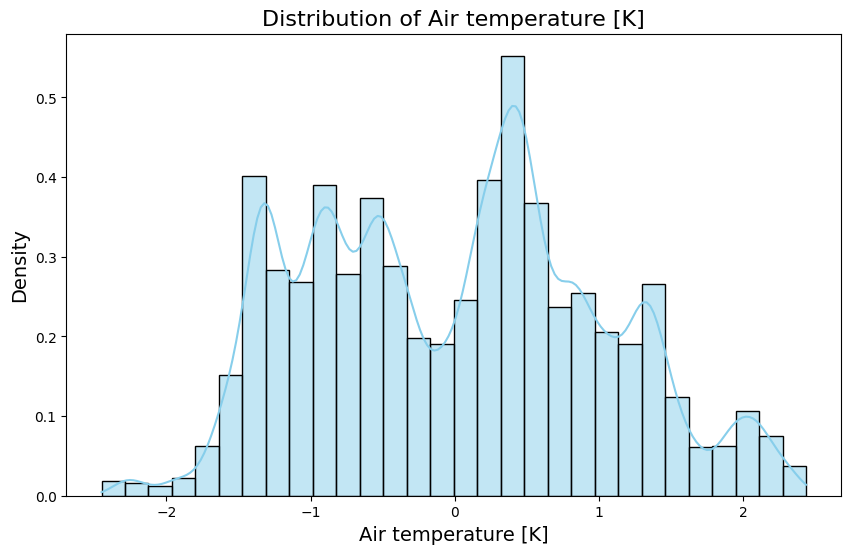

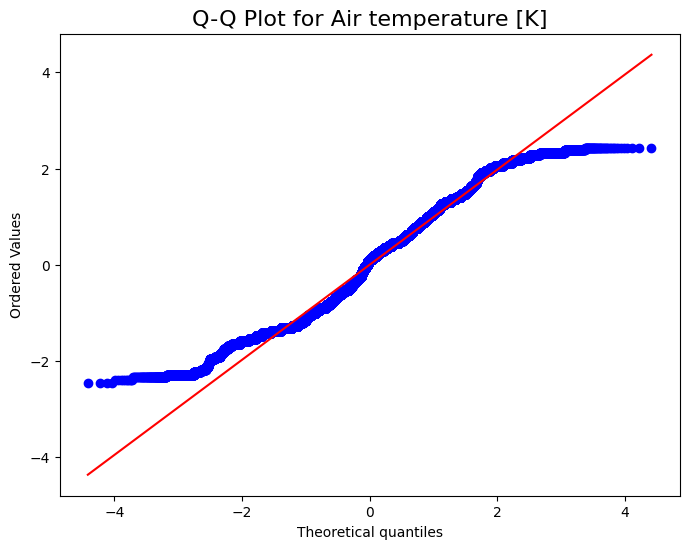

Descriptive statistics for Air temperature [K]:
count    1.364290e+05
mean     7.235579e-15
std      1.000004e+00
min     -2.450154e+00
25%     -8.391913e-01
50%      7.368772e-02
75%      7.180729e-01
max      2.436433e+00
Name: Air temperature [K], dtype: float64
Skewness: 0.16117486841593778
Kurtosis: -0.781569393347219
Shapiro-Wilk Test p-value: 6.559940703533422e-79
Air temperature [K] does not follow a normal distribution (reject null hypothesis).


c:\Users\tanve\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 136429.
  res = hypotest_fun_out(*samples, **kwds)


In [147]:
# Chart - 5 visualization code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df is your DataFrame (replace with your dataset)
# Example: df = pd.read_csv('your_data.csv')

# 1. Choose a column to analyze (e.g., 'Air temperature [K]')
column = 'Air temperature [K]'

# 2. Plot the histogram and normal distribution curve
plt.figure(figsize=(10, 6))
sns.histplot(df[column], kde=True, color='skyblue', stat='density', bins=30)
plt.title(f'Distribution of {column}', fontsize=16)
plt.xlabel(f'{column}', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

# 3. Q-Q plot to assess normality
plt.figure(figsize=(8, 6))
stats.probplot(df[column], dist="norm", plot=plt)
plt.title(f'Q-Q Plot for {column}', fontsize=16)
plt.show()

# 4. Descriptive statistics
desc_stats = df[column].describe()
print(f"Descriptive statistics for {column}:")
print(desc_stats)

# 5. Check skewness and kurtosis
skewness = df[column].skew()
kurtosis = df[column].kurt()
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# 6. Perform Shapiro-Wilk Test for normality (p-value < 0.05 suggests non-normal distribution)
stat, p_value = stats.shapiro(df[column])
print(f"Shapiro-Wilk Test p-value: {p_value}")

# 7. Interpret normality
if p_value > 0.05:
    print(f"{column} follows a normal distribution (fail to reject null hypothesis).")
else:
    print(f"{column} does not follow a normal distribution (reject null hypothesis).")





##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [148]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [149]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [150]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [151]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [152]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [153]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [154]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [155]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [156]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [157]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***